<a href="https://colab.research.google.com/github/wahyuazizi/Predictive_Analysis_ML_Dicoding/blob/main/Predicitve_Analytic_Vehicle_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

brsahan_vehicle_co2_emissions_dataset_path = kagglehub.dataset_download('brsahan/vehicle-co2-emissions-dataset')
wahyuazizi_kagglesjson_path = kagglehub.dataset_download('wahyuazizi/kagglesjson')

print('Data source import complete.')


100%|██████████| 228/228 [00:00<00:00, 284kB/s]

Extracting files...
Data source import complete.


# Laporan Proyek Machine Learning - Wahyu Azizi

## Domain Proyek

Peningkatan emisi karbon dioksida (CO2) dari kendaraan bermotor menjadi salah satu penyumbang utama perubahan iklim global. Hal ini disebabkan oleh pertumbuhan jumlah kendaraan yang pesat, terutama di negara-negara berkembang seperti Indonesia. Kendaraan bermotor, terutama yang menggunakan bahan bakar fosil, menghasilkan emisi CO2 melalui proses pembakaran. Penelitian menunjukkan bahwa sektor transportasi berkontribusi signifikan terhadap total emisi gas rumah kaca. Di Indonesia, emisi dari transportasi diperkirakan mencapai 85% dari total pencemaran udara, dengan kendaraan pribadi dan sepeda motor sebagai penyumbang terbesar [[1](https://www.semanticscholar.org/paper/Kajian-Emisi-CO2-Dari-Kendaraan-Bermotor-Di-Kampus-Anggraeni/214a377555002c31829c59dbf1dea7cfb396ef8d)].  
Sebuah studi di Jalan Raya Kemantren, Sidoarjo, menunjukkan bahwa potensi emisi CO2 dari sepeda motor mencapai 67.568,26 g dalam 30 menit per kilometer, sedangkan mobil menghasilkan sekitar 63.335,30 g pada periode yang sama[[2](https://www.semanticscholar.org/paper/Analisis-Potensi-Emisi-CO2-Oleh-Berbagai-Jenis-di-Sudarti-Yushardi/81d79cda27154bdf4c54548423a878659b872df5)]. Selain itu, kawasan industri seperti SIER di Surabaya juga mengalami peningkatan emisi CO2 akibat tingginya kepadatan kendaraan dan kemacetan[[3](https://www.semanticscholar.org/paper/Analisis-Besaran-Emisi-Gas-CO2-Kendaraan-Bermotor-Kusumawardani-Navastara/54310e88f91c19e3519403d20b70adf299d55a3b)][[4](https://www.semanticscholar.org/paper/Arahan-Penyediaan-Ruang-Terbuka-Hijau-Dalam-Emisi-Kusumawardani/52438bef01b4397f8f43cc90d4a3a8dafc5edea6)]. Peningkatan emisi CO2 berkontribusi pada efek rumah kaca, yang berujung pada pemanasan global. Kenaikan suhu akibat peningkatan konsentrasi gas rumah kaca dapat menyebabkan perubahan iklim yang ekstrem, termasuk cuaca yang tidak menentu dan bencana alam[[5](https://www.semanticscholar.org/paper/ANALISIS-SHIFTING-PENGGUNAAN-MODA-KENDARAAN-KE-API-Amelia-Samadikun/9b4974abd17e7a013948ebb8f2ca4cf11b924e60)]. Penelitian juga menunjukkan bahwa daerah dengan kepadatan transportasi tinggi mengalami penurunan kualitas udara dan peningkatan suhu[[3](https://www.semanticscholar.org/paper/Analisis-Besaran-Emisi-Gas-CO2-Kendaraan-Bermotor-Kusumawardani-Navastara/54310e88f91c19e3519403d20b70adf299d55a3b)].  
Kualitas udara yang buruk diakibatkan oleh peningkatan jumlah kendaraan bermotor yang menghasilkan emisi gas berbahaya seperti karbon dioksida (CO2), nitrogen oksida (NOx), dan partikel halus (PM). Di DKI Jakarta, misalnya, kebijakan uji emisi diharapkan dapat mengurangi polusi, namun tantangan dalam pengawasan dan pertumbuhan jumlah kendaraan tetap menjadi masalah besar[[6](https://www.semanticscholar.org/paper/Analisis-Kebijakan-Pengendalian-Polusi-melalui-Uji-Paradizsa/72478900647357dab65f36a62ac558041e1dff34)]. Penelitian menunjukkan bahwa emisi dari kendaraan pribadi berkontribusi signifikan terhadap pencemaran udara di daerah dengan kepadatan lalu lintas tinggi, seperti Kota Semarang[[7](https://www.semanticscholar.org/paper/ESTIMASI-EMISI-PENCEMAR-UDARA-KONVENSIONAL-(SOx%2C-DI-Buanawati-Huboyo/1aa8e1dc1be0e8e43c33b4a19a806625c8f01d15)].  
Data science memainkan peran penting dalam memahami dan menganalisis pola emisi dari kendaraan bermotor. Dengan memanfaatkan teknik analisis data, machine learning, dan pemodelan statistik, para peneliti dan pembuat kebijakan dapat memperoleh wawasan yang lebih baik mengenai sumber emisi, tren, dan dampaknya terhadap lingkungan.

# Business Understanding

## Problem Statement

Peningkatan emisi karbon dioksida (CO2) dari kendaraan bermotor menjadi salah satu penyumbang utama perubahan iklim global. Di Indonesia, sektor transportasi menyumbang hingga 85% dari total pencemaran udara, dengan kendaraan pribadi dan sepeda motor sebagai kontributor terbesar. Emisi ini terutama dipengaruhi oleh berbagai karakteristik kendaraan, termasuk ukuran mesin, jenis bahan bakar, dan efisiensi bahan bakar. Namun, tantangan muncul dari banyaknya faktor yang memengaruhi emisi, sehingga sulit untuk memahami pola emisi tanpa analisis yang mendalam.

Predictive analytics memberikan peluang untuk memanfaatkan data kendaraan dan mengembangkan model prediktif guna memahami dan memitigasi emisi CO2. Dengan memanfaatkan data seperti konsumsi bahan bakar, jenis transmisi, dan kapasitas mesin, model dapat membantu memprediksi emisi CO2 dengan akurasi tinggi.

## Goals

1. Membangun model prediktif untuk memprediksi emisi CO2 kendaraan berdasarkan dataset yang tersedia.
2. Mengidentifikasi hubungan antara variabel seperti tipe atau ukuran mesin, jenis bahan bakar, dan konsumsi bahan bakar dan variabel lainnya terhadap emisi CO2.

## Solutions

1. Pemanfaatan Dataset
Dataset mencakup berbagai variabel kendaraan seperti:
- Spesifikasi kendaraan: merek, model, ukuran mesin, jumlah silinder, jenis bahan bakar, dan jenis transmisi.
- Efisiensi bahan bakar: konsumsi bahan bakar di area perkotaan, jalan raya, dan kombinasi dalam liter per 100 km atau mil per galon (mpg).
- Target prediksi: emisi CO2 dalam gram per kilometer.
2. Penggunaan Algoritma Machine Learning
Untuk membangun model prediksi emisi CO2, digunakan tiga algoritma:

- ```K-Nearest Neighbors (KNN)```:
  Memanfaatkan kemiripan antara kendaraan berdasarkan spesifikasi dan konsumsi bahan bakar. Cocok untuk data dengan pola non-linear, meskipun memerlukan tuning parameter seperti jumlah tetangga (k) agar optimal.
- ```Random Forest```:  
    Membantu memahami faktor mana yang paling memengaruhi emisi, seperti kapasitas mesin atau jenis bahan bakar. Memberikan hasil prediksi yang stabil dengan menangani dataset yang kompleks dan tidak seimbang.
- ```Boosting```:  
    Digunakan untuk meningkatkan akurasi dengan mengatasi kesalahan prediksi pada model sebelumnya. Mampu menangani interaksi kompleks antara fitur, cocok untuk dataset ini yang melibatkan banyak variabel interdependen.

# Import Library

Import library yang diperlukan untuk predictive analytic

In [4]:
!pip install --upgrade seaborn

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import kagglehub
import os

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from wordcloud import WordCloud

# Data Understanding

Dataset ini berisi informasi tentang spesifikasi kendaraan, konsumsi bahan bakar, dan emisi CO2 yang dikumpulkan untuk menganalisis dampak lingkungan dari kendaraan serta memprediksi emisi CO2 menggunakan model regresi. Dataset ini dirancang untuk mendukung pendekatan **Simple Linear Regression (SLR)** dan **Multiple Linear Regression (MLR)** dalam proyek machine learning.

Tautannya dapat diakses di sini:  
[Vehicle CO2 Emissions Dataset](https://www.kaggle.com/datasets/brsahan/vehicle-co2-emissions-dataset)

## Data Loading

Sebelum melakukan eksplorasi data, terlebih dahulu kita load data, seperti berikut:

In [6]:
# Download
path = kagglehub.dataset_download("brsahan/vehicle-co2-emissions-dataset")

print("path dataset: ", path)

path dataset:  /root/.cache/kagglehub/datasets/brsahan/vehicle-co2-emissions-dataset/versions/1


In [7]:
# Cek list file dalam path
files = os.listdir(path)
print("daftar file dalam path:")
for file in files:
    print(file)

daftar file dalam path:
co2.csv


In [8]:
# Load dataset
df = pd.read_csv(f"{path}/{file}", low_memory=False)
print(df.shape)

pd.set_option('display.max_columns', None)
df.head()

(7385, 12)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Dari hasil diatas diperoleh:
* total record sebanyak ```7385```
* terdapat ```12 variabel```

## Exploratory Data Analysis

### EDA - Deskripsi Variabel

Berikut detail dari tiap-tiap variabel yang ada untuk memahami data yang kita proses

| Nama Kolom                          | Deskripsi                                                                 |
|-------------------------------------|---------------------------------------------------------------------------|
| Make                                | Merek atau produsen kendaraan (contoh: Toyota, Ford, BMW).               |
| Model                               | Model spesifik kendaraan.                                                |
| Vehicle Class                       | Klasifikasi kendaraan berdasarkan ukuran dan penggunaan (contoh: SUV, Sedan). |
| Engine Size(L)                      | Volume kapasitas mesin dalam liter.                                      |
| Cylinders                           | Jumlah silinder pada mesin kendaraan.                                    |
| Transmission                        | Jenis transmisi kendaraan (contoh: Otomatis, Manual).                    |
| Fuel Type                           | Jenis bahan bakar yang digunakan oleh kendaraan.                         |
| Fuel Consumption City (L/100 km)    | Konsumsi bahan bakar di area perkotaan dalam liter per 100 kilometer.    |
| Fuel Consumption Hwy (L/100 km)     | Konsumsi bahan bakar di jalan raya dalam liter per 100 kilometer.        |
| Fuel Consumption Comb (L/100 km)    | Konsumsi bahan bakar gabungan (rata-rata kota dan jalan raya) dalam liter per 100 kilometer. |
| Fuel Consumption Comb (mpg)         | Konsumsi bahan bakar gabungan dalam mil per galon (mpg).                 |
| CO2 Emissions(g/km)                 | Emisi karbon dioksida per kilometer (target prediksi).                   |

### Penjelasan Fuel Type:
- **X**: Bensin biasa (regular gasoline)  
- **Z**: Bensin premium (premium gasoline)  
- **D**: Diesel  
- **E**: E85 (campuran bensin dan etanol)  
- **N**: Gas alam (natural gas)  


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

dari deskripsi variabel dan informasi di atas, dapat diperoleh bahwa tidak ada missing value dan tidak terdapat masalah pada tipe data dalam dataset. Selanjutnya untuk lebih detailnya periksa total missing value dan jika terdapat duplikasi data.

### EDA - Cleaning Data

#### Menangani Missing Value & Duplicate Data

In [10]:
pd.DataFrame({'Daftar Missing Value:':df.isnull().sum()})

,Daftar Missing Value:
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


In [11]:
# Menampilkan baris duplikat
duplicates = df[df.duplicated()]

# Jumlah baris duplikat
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 1103


In [12]:
df = df.drop_duplicates()
# Memeriksa ulang jumlah duplikat
print("Jumlah duplikat setelah pembersihan:", df.duplicated().sum())

Jumlah duplikat setelah pembersihan: 0


Berdasarkan informasi diatas, dataset tersebut tidak memiliki missing value sama sekali, akan tetapi memiliki duplicate value yang lumayan banyak yaitu sebanyak ```1103``` data yang terduplikasi, sehingga harus dihilangkan.

#### Menangani Outliers

In [13]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


dari ringkasan statistik yang diperoleh:  

---

##### **Penjelasan Statistik Deskriptif**

**1. Engine Size (L)**:
- **Rata-rata** ukuran mesin adalah **3.16 L**, dengan **median** (nilai tengah) sebesar **3.00 L**.
- Ukuran mesin terkecil adalah **0.90 L**, sedangkan yang terbesar adalah **8.40 L**.
- **Standar deviasi** sebesar **1.37 L** menunjukkan bahwa ukuran mesin memiliki variasi yang cukup besar.
- **Kuartil pertama (Q1)** sebesar **2.00 L** dan **kuartil ketiga (Q3)** sebesar **3.70 L** menunjukkan bahwa 50% kendaraan memiliki ukuran mesin antara **2.00 L** dan **3.70 L**.

**2. Cylinders (Jumlah Silinder)**:
- Kendaraan memiliki rata-rata **5.62 silinder**, dengan **median** sebesar **6 silinder**.
- Kendaraan dengan jumlah silinder terkecil memiliki **3 silinder**, sementara yang terbesar memiliki **16 silinder**.
- Sebagian besar kendaraan (50%) memiliki jumlah silinder antara **4** dan **6**.

**3. Fuel Consumption City (L/100 km)**:
- **Rata-rata konsumsi bahan bakar di kota** adalah **12.61 L/100 km**, dengan nilai **median** sebesar **12.10 L/100 km**.
- Konsumsi terkecil adalah **4.20 L/100 km**, sementara yang terbesar mencapai **30.60 L/100 km**.
- Nilai **kuartil pertama (Q1)** sebesar **10.10 L/100 km** dan **kuartil ketiga (Q3)** sebesar **14.70 L/100 km** menunjukkan bahwa sebagian besar kendaraan berada di antara rentang ini.

**4. Fuel Consumption Hwy (L/100 km)**:
- **Rata-rata konsumsi bahan bakar di jalan raya** adalah **9.07 L/100 km**, dengan median sebesar **8.70 L/100 km**.
- Konsumsi bahan bakar minimum adalah **4.00 L/100 km**, sementara maksimum adalah **20.60 L/100 km**.
- Sebagian besar kendaraan memiliki konsumsi bahan bakar jalan raya antara **7.50 L/100 km** (Q1) dan **10.30 L/100 km** (Q3).

**5. Fuel Consumption Comb (L/100 km)**:
- **Rata-rata konsumsi bahan bakar kombinasi** adalah **11.02 L/100 km**, dengan nilai median sebesar **10.60 L/100 km**.
- Rentang konsumsi adalah dari **4.10 L/100 km** hingga **26.10 L/100 km**.
- Sebagian besar kendaraan memiliki konsumsi bahan bakar kombinasi antara **8.90 L/100 km** (Q1) dan **12.70 L/100 km** (Q3).

**6. Fuel Consumption Comb (mpg)**:
- **Rata-rata efisiensi bahan bakar dalam miles per gallon (mpg)** adalah **27.41 mpg**, dengan median sebesar **27 mpg**.
- Kendaraan paling tidak efisien memiliki efisiensi **11 mpg**, sedangkan kendaraan paling efisien mencapai **69 mpg**.
- Sebagian besar kendaraan memiliki efisiensi antara **22 mpg** (Q1) dan **32 mpg** (Q3).

**7. CO2 Emissions (g/km)**:
- **Rata-rata emisi CO2** adalah **251.16 g/km**, dengan nilai median sebesar **246 g/km**.
- Kendaraan dengan emisi CO2 terendah menghasilkan **96 g/km**, sedangkan kendaraan dengan emisi tertinggi menghasilkan **522 g/km**.
- Sebagian besar kendaraan memiliki emisi antara **208 g/km** (Q1) dan **289 g/km** (Q3).

---

##### **Catatan Tambahan:**
- **Outlier**: Nilai yang jauh di luar rentang normal, seperti konsumsi bahan bakar kombinasi yang mencapai **26.10 L/100 km** atau emisi CO2 sebesar **522 g/km**, dan variabel mungkin memerlukan perhatian lebih karena berpotensi menjadi *outlier*.
- **Variabilitas**: Fitur seperti konsumsi bahan bakar dan emisi CO2 menunjukkan tingkat variabilitas yang cukup tinggi, seperti yang ditunjukkan oleh standar deviasi yang besar.

In [14]:
numerical_features = df.select_dtypes(include=np.number).columns

n_cols = 2
n_rows = (len(numerical_features) + n_cols -1) // n_cols

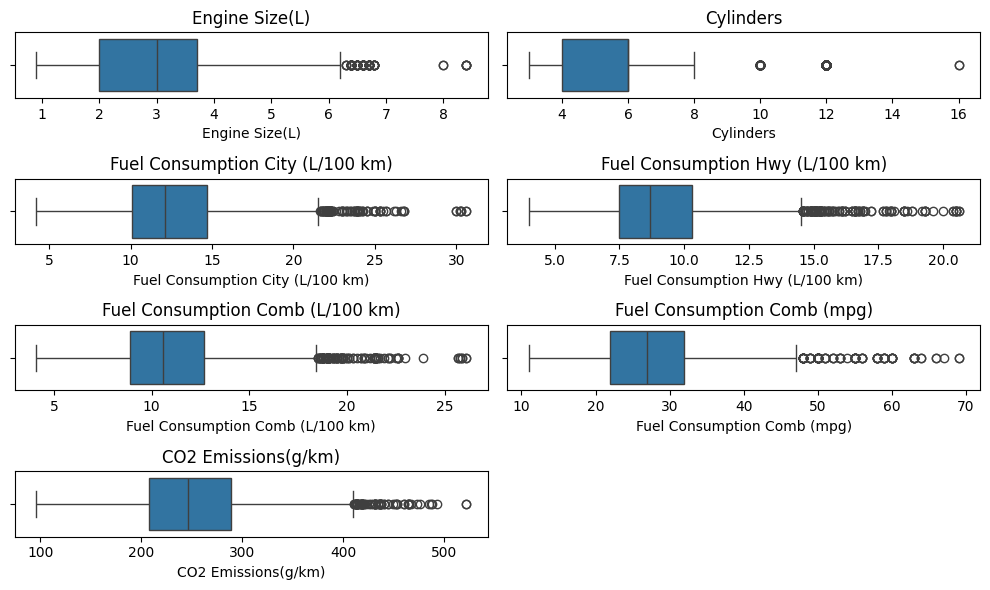

In [15]:
# setup figure dengan subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 1.5 * n_rows))

axes = axes.flatten()
for i in range(len(numerical_features)):
    sns.boxplot(ax=axes[i], x=df[numerical_features[i]])
    axes[i].set_title(numerical_features[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### **Menangani Outlier Menggunakan Metode IQR**

Outlier adalah nilai yang berada jauh di luar rentang normal data. Salah satu cara yang efektif untuk mengidentifikasi dan menangani outlier adalah menggunakan **Metode IQR (Interquartile Range)**. Berikut adalah langkah-langkah dan cara melakukannya:

1. **Definisi IQR**
Interquartile Range (IQR) adalah rentang antara kuartil ketiga (Q3) dan kuartil pertama (Q1), yang merepresentasikan 50% data tengah.

2. **Identifikasi Outlier**
Outlier didefinisikan sebagai nilai yang berada di bawah atau di atas batas berikut:
- **Batas Bawah (Lower Bound)**
- **Batas Atas (Upper Bound)**

Nilai yang:
- Kurang dari **Lower Bound** dianggap sebagai *outlier bawah*.
- Lebih dari **Upper Bound** dianggap sebagai *outlier atas*.

3. **Langkah-langkah Penanganan**  


In [16]:
numerical_features = df.select_dtypes(include=['number'])

Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

# Menyaring outlier berdasarkan IQR
df = df[~((numerical_features < (Q1 - 1.5 * IQR)) | (numerical_features > (Q3 + 1.5 * IQR))).any(axis=1)]


In [17]:
df.shape

(5816, 12)

In [18]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000,5816.000000
mean,3.014254,5.391678,12.233253,8.831327,10.702975,27.664718,246.004814
std,1.215559,1.517327,2.858852,1.864839,2.379066,6.043525,50.208692
min,0.900000,3.000000,5.600000,4.500000,6.000000,16.000000,128.000000
25%,2.000000,4.000000,10.000000,7.400000,8.900000,23.000000,207.000000
50%,3.000000,6.000000,11.900000,8.600000,10.400000,27.000000,242.000000
75%,3.600000,6.000000,14.100000,9.900000,12.300000,32.000000,281.000000
max,6.200000,8.000000,21.300000,14.500000,18.100000,47.000000,407.000000


### EDA - Univariate Analysis

#### Word Cloud

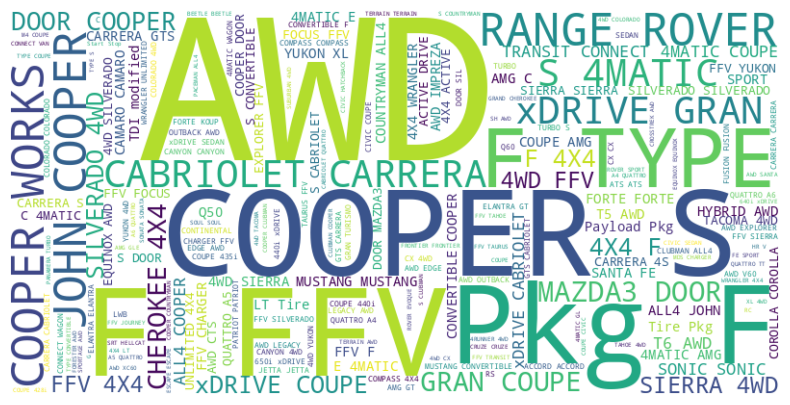

In [19]:
# Gabungkan semua nilai dalam kolom 'Model' menjadi satu string
models_text = " ".join(df['Model'].dropna())

# Buat Word Cloud
wordcloud = WordCloud(
    width=800, height=400, background_color='white',
    colormap='viridis'
).generate(models_text)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Variabel Model memiliki value sangat beragam sehingga visualisasi word cloud adalah yang cocok. Dimana Model sepet ```AWD```, ```COOPER```, ```TYPE```, ```FFV```, ```ROVER``` lebih banyak muncul dalam data

#### Categorical Features

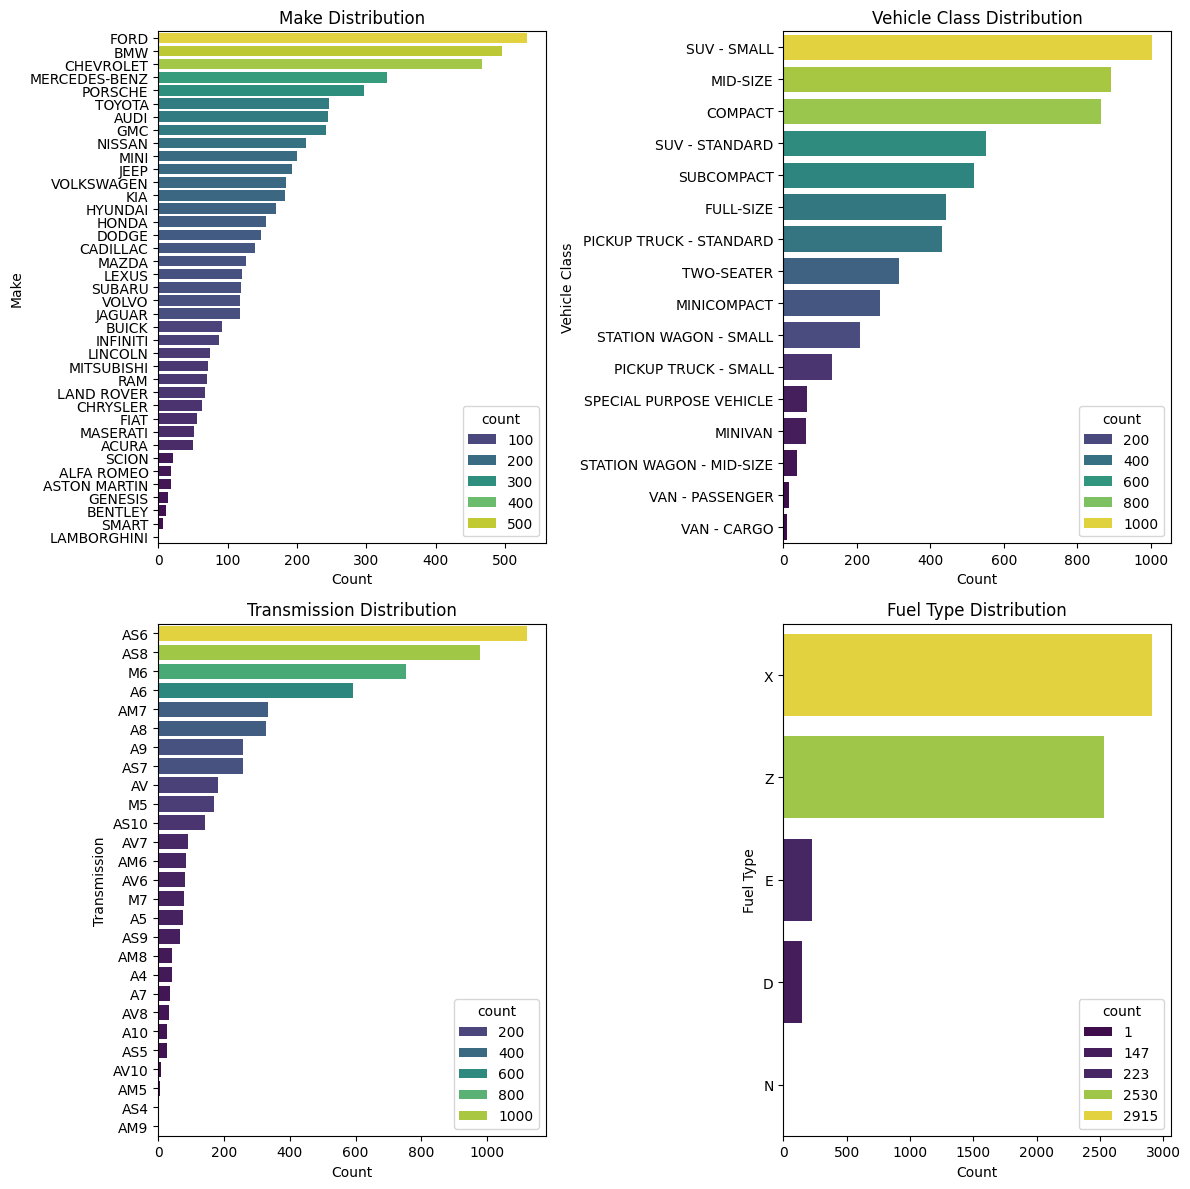

In [20]:
# Seleksi fitur kategorikal, dengan mengabaikan kolom 'Model' jika ada
categorical_features = df.select_dtypes(include=['object']).drop(columns=['Model'], errors='ignore')

# Tentukan jumlah kolom dan baris untuk plot
n_cols = 2
n_rows = (len(categorical_features.columns) + n_cols - 1) // n_cols  # Menghitung jumlah baris

# Membuat subplots dengan dua kolom
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))

# Loop untuk setiap fitur kategorikal
for i, cat_feature in enumerate(categorical_features.columns):
    # Hitung distribusi frekuensi untuk masing-masing fitur kategorikal
    count = df[cat_feature].value_counts()

    # Menentukan subplot saat ini
    ax = axes.flatten()[i]

    # Membuat horizontal bar plot dengan colormap 'viridis' pada subplot tertentu
    sns.barplot(x=count.values, y=count.index, hue=count, palette='viridis', ax=ax)

    # Menambahkan label dan judul
    ax.set_title(f'{cat_feature} Distribution')
    ax.set_xlabel('Count')
    ax.set_ylabel(cat_feature)

# Menyesuaikan layout agar plot tidak saling tumpang tindih
plt.tight_layout()
plt.show()

Berikutnya, distribusi tiap variabel kategori.  
- Distribusi ```Make```  ada vehicle dari ```FORD, BMW, CHEVROLET``` merupakan tiga teratas yang paling banyak digunakan dan ```LAMBORGHINI``` yang paling rendah.
- Pada variabel ```Vehicle Class``` ada class```SUV-SMALL, MID-SIZE, COMPACT``` yang merupakan top three yang paling banyak digunakan dan class ```VAN-CARGO``` adalah yang paling sedikit.
- Untuk variabel  ```Transmission``` terdapat ```AS6, AS8, M6, A6``` yang merupakan empat teratas untuk transmisi yang paling banyak digunakan dan transmisi ```AV10, AM5, AS4, AM9``` merupakan yang paling rendah.
- Dan pada variabel ```Fuel Type```, Jenis ```X (Regular) dan Z (Premium)``` adalah tipe bahan bakar yang paling umum digunakan, type ```E (E85 Campuran Bensin dan Etanol) dan D (Diesel)``` dengan rentang 147-223, sedangkan ```N (Natural Gas)``` hanya satu dalam data.

#### Numerical Features

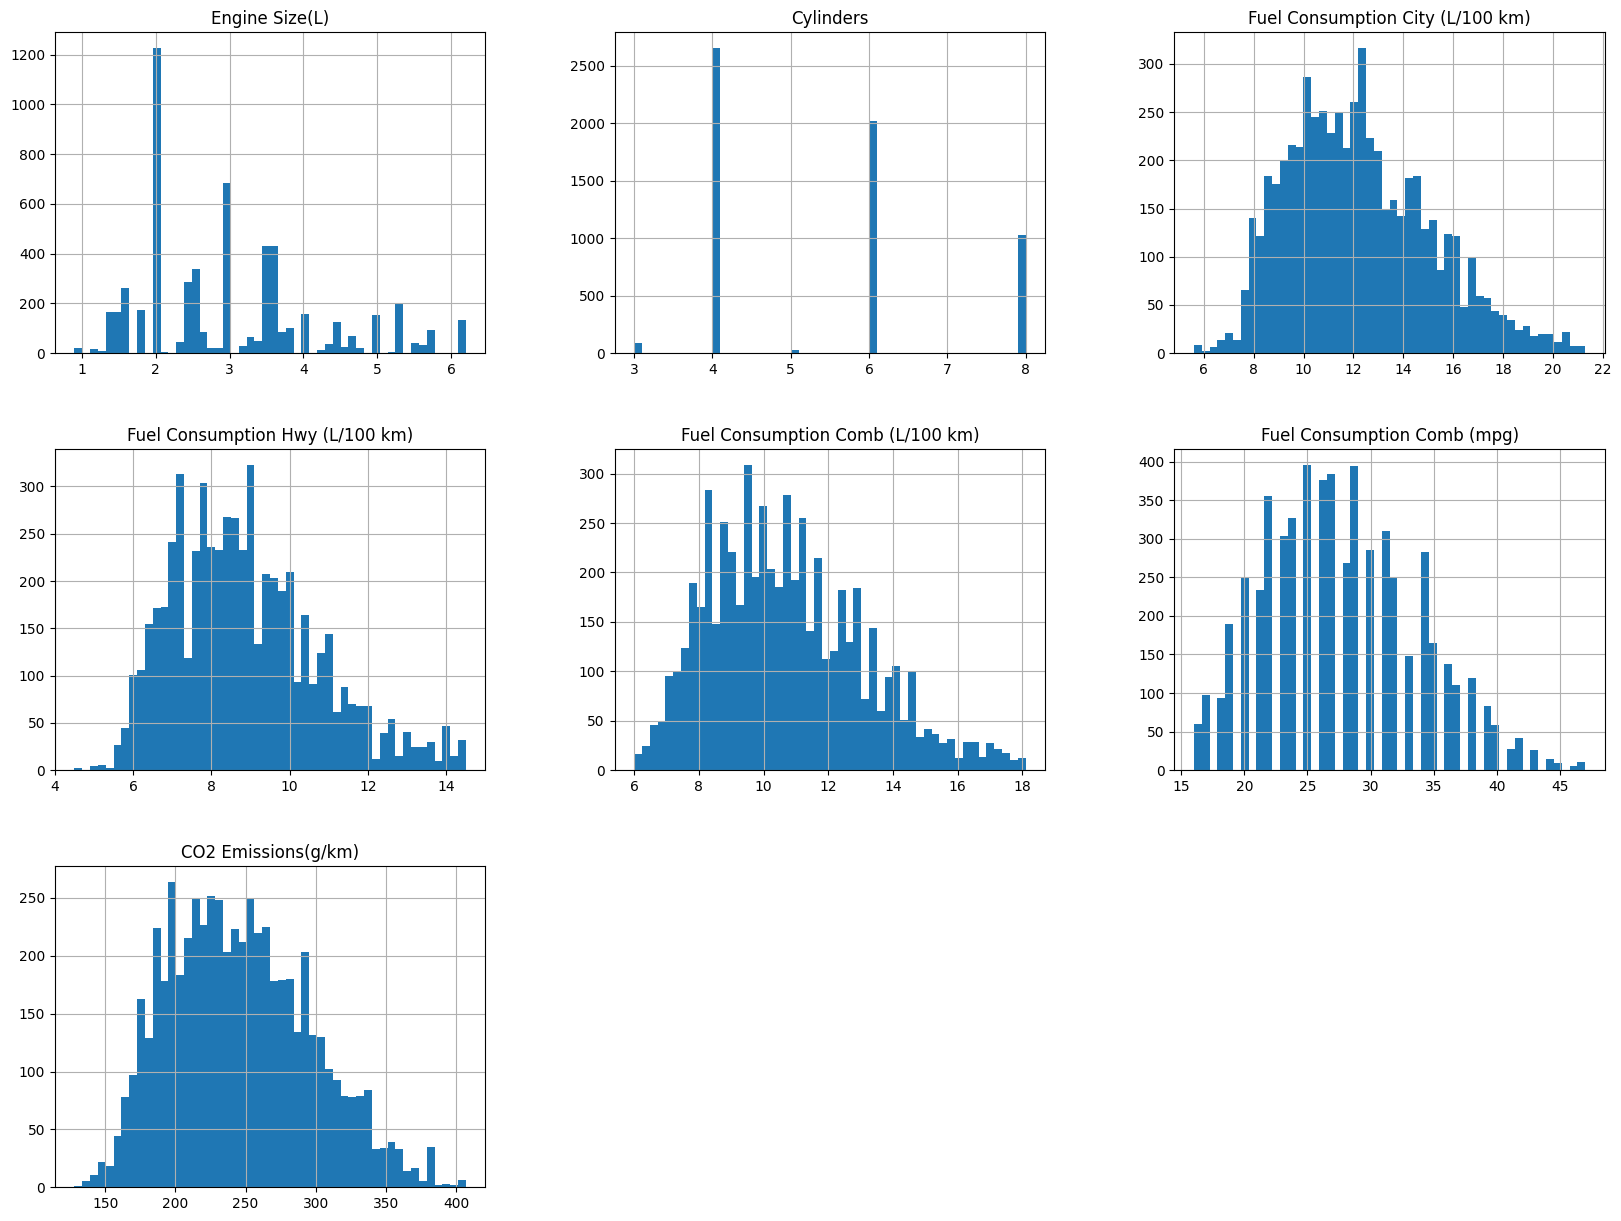

In [21]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**Distribusi fitur numerik**  
- ```Engine Size(L)``` dengan rentang 2-4 merupakan size yang paling umum digunakan
- ```Cylinders``` dengan value ```4,6,8``` adalah cylinder yang paling banyak digunakan pada kendaraan.
- Pada ```Fuel Consumption City L/100Km``` paling banyak dihabiskan diantara rentang 10-13L per 100 Km
- Untuk ```Fuel Consumption Hwy L/100Km``` paling banyak dihabiskan dengan rentang 7-9L per 100 Km
- Fitur ```Fuel Consumption Comb L/100Km``` dengan rentang 8-12L paling banyak dihabiskan per 100 Km
- Pada ```Fuel Consumption Comb mpg``` paling banyak menjangkau diantara rentang 20-35 miles per galon
- Dan pada fitur ```CO2 Emissions g/km``` sumbangan emisi diantara 200-250 paling banyak

### EDA - Multivariate Analysis

#### Categorical Features

In [22]:
df.drop("Model", axis=1, inplace=True)

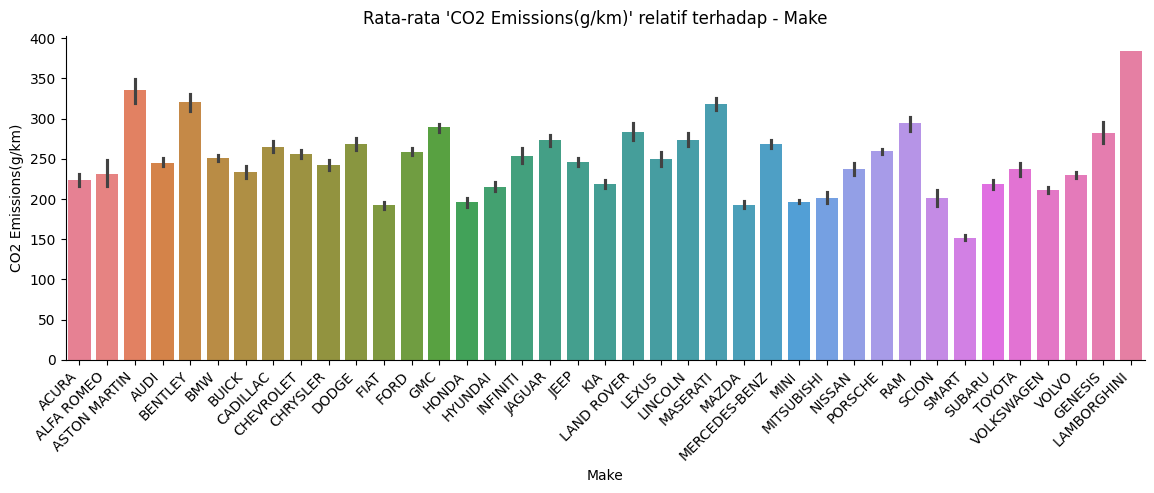

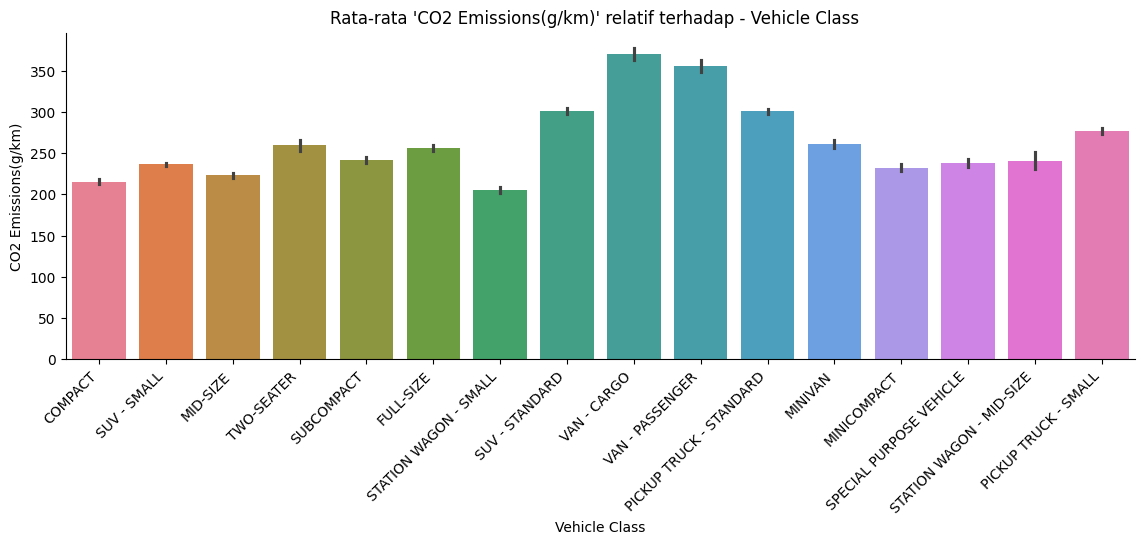

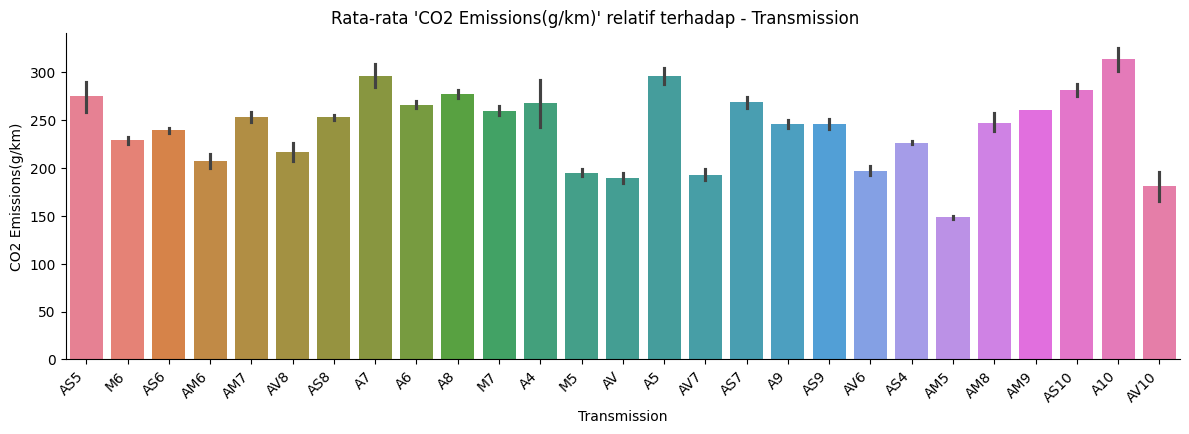

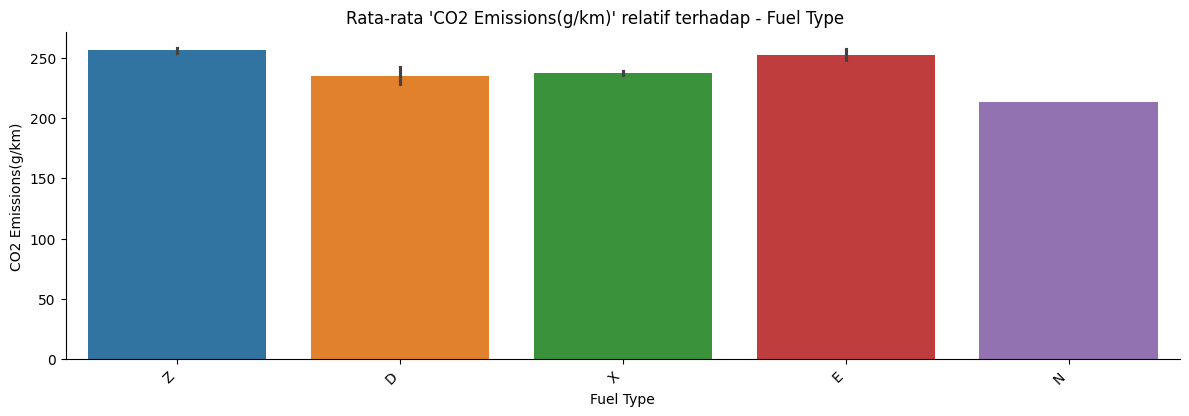

In [23]:
y = ['CO2 Emissions(g/km)']
x = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']

for f in y:
    for col in x:
        # Buat catplot
        g = sns.catplot(
            data=df, x=col, y=f, kind='bar', dodge=False, height=4, aspect=3, hue=col
        )
        # Tambahkan judul
        g.fig.suptitle(f"Rata-rata '{f}' relatif terhadap - {col}", y=1.02)
        # Rotasi sumbu x dengan benar
        for label in g.ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')

        # Tampilkan plot
        plt.show()

**Distribusi fitur kategori terhadap CO2 Emissions**  

- Fitur ```Make``` dengan penyumbang emisi terbanyak adalah ```LAMBORGHINI, ASTON MARTIN, BENTLEY, dan MASERATI``` akan tetapi penggunaannya sangat-sangat rendah, bisa dilihat pada barplot horizontal di fase *Univariate Analysis*, dan rata-rata menyumbang emisi rentang 200-250 g/km
- Penyumbang emisi terbanyak pada fitur ```Vehicle Class``` adalah ```VAN-CARGO, dan VAN-PASSENGER``` tapi merupakan class yang paling sedikit digunakan. sedangkan untuk class yang paling banyak digunakan yakni ```SUV-SMALL, MID-SIZE, dan COMPACT``` menyumbang emisi diantara rentang 200-250 g/km
- Selanjutnya jenis ```Transmission``` yang paling banyak menyumbang emisi CO2 adalah jenis ```A10, A7, dan A5``` tapi merupakan jenis tranmisi yang tergolong rendah untuk penggunaannya. Untuk Transmisi yang paling sering digunakan yakni ```AS6, AS8, dan M6``` menyumbang emisi dengan rentang 200-250 g/km
- Rata-rata semua ```Fuel Type``` menyumbang emisi yang tinggi, akan tetapi type ```N``` belum bisa disimpulkan karna data yang ada hanya satu dalam dataset.

#### Numerical Features

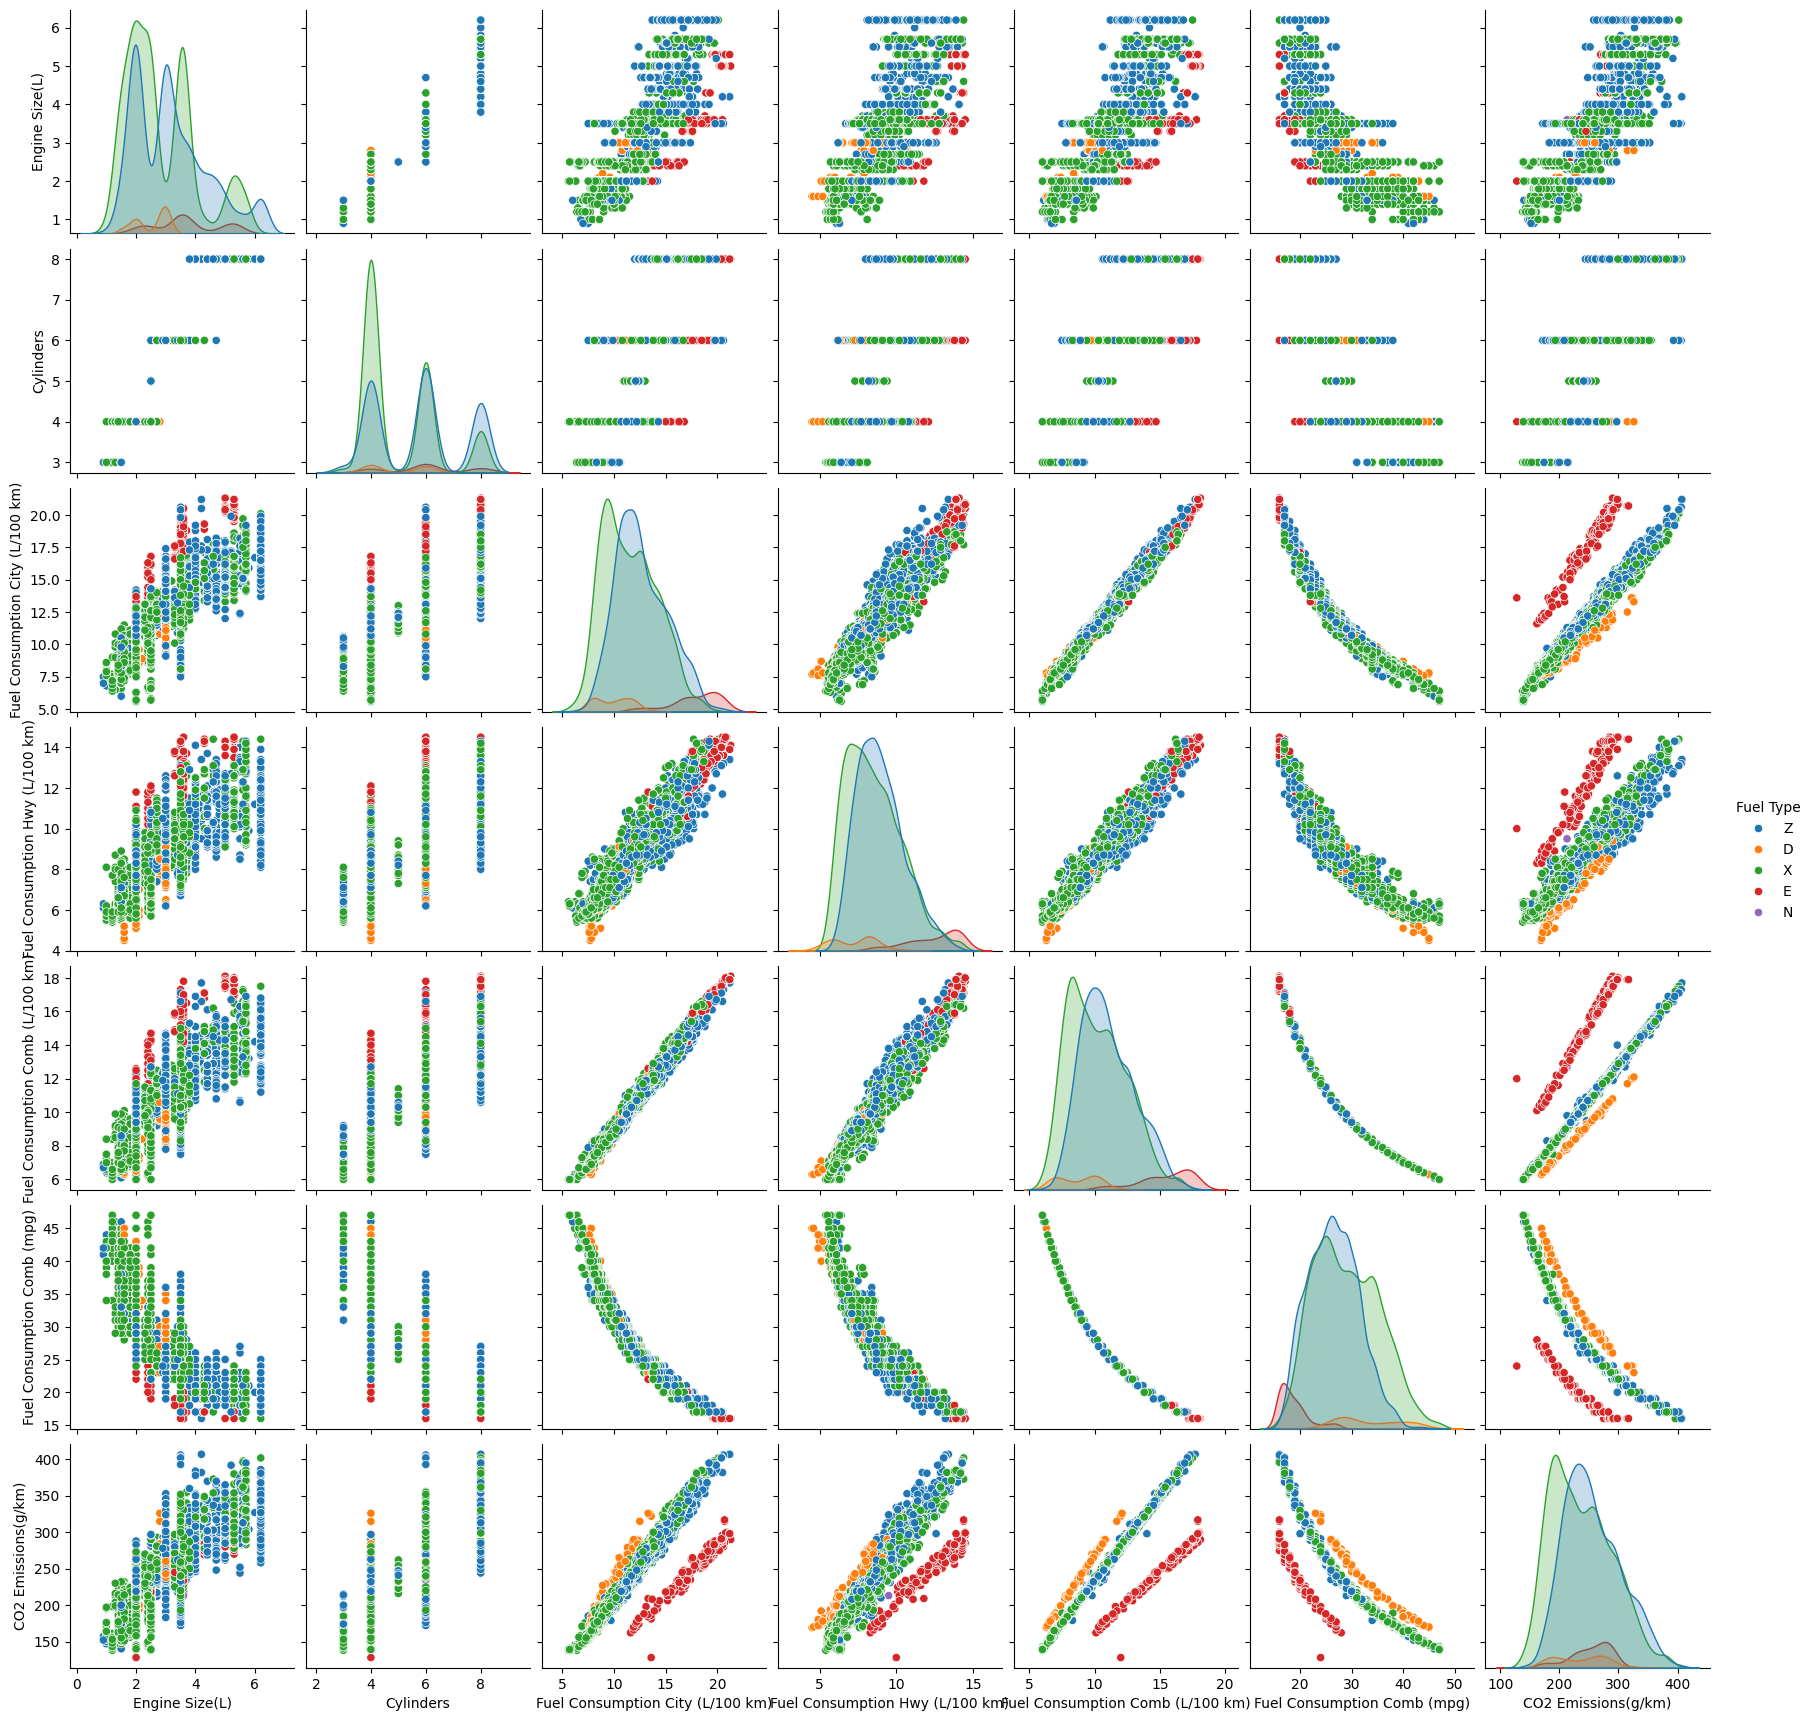

In [24]:
sns.pairplot(df, diag_kind='kde', hue="Fuel Type")
plt.show()

Relasi antara fitur numerik dengan fitur target yakni ```CO2 Emissions``` positif kecuali fitur ```Fuel Consumption(mpg)```, ini karna metode perhitungan miles per galon menghitung total jarak yang ditempuh per galonnya, semakin tinggi nilai tempuhnya maka semakin sedikit emisi yang dikeluarkan. Dari fitur ```Engine Size (L)``` semakin besar kapasitas mesin maka emisi yang dihasilkan semakin besar. Pada fitur ```Cylinders``` juga menunjukkan relasi yang positif dengan cylinder tertinggi menghasilkan emisi yang tinggi juga. untuk fitur ```Consumption``` yang menggunakan ukuran L/km menunjunkan relasi yang positif bahwa meningkatnya penggunaan tentu menghasilkan emisi yang berlebihan.
Nilai relasi rentang -1 hingga +1 bisa dilihat dalam hetmap berikut.

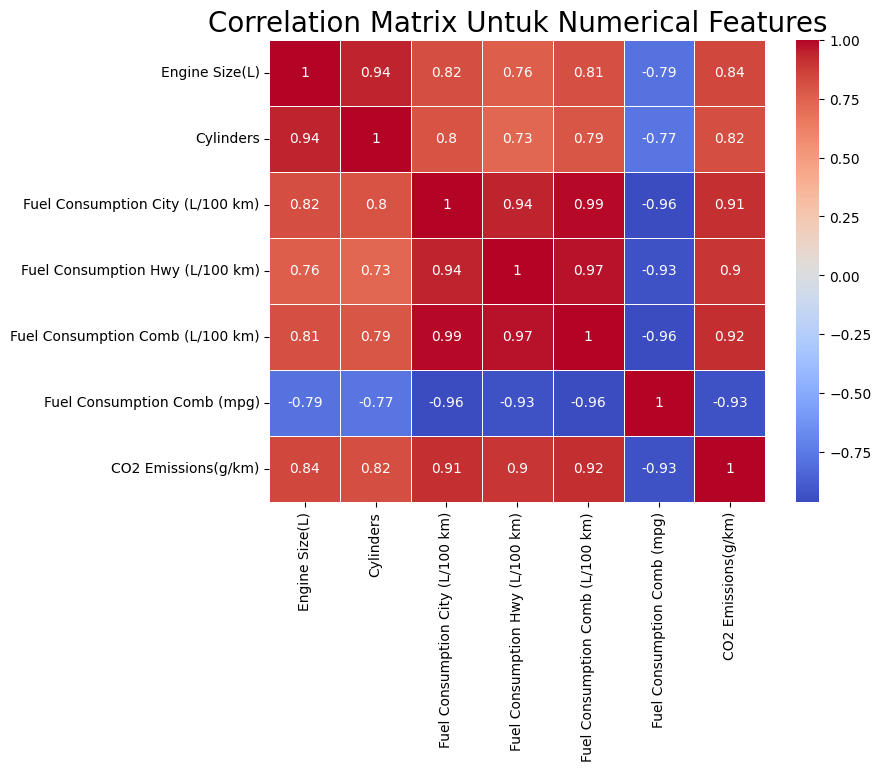

In [25]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(8,6))

corr_matrix = df[numerical_features].corr().round(2)
#gunakan annot=True untuk menampilkan nilai dalam kotak
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Correlation Matrix Untuk Numerical Features", size=20)
plt.show()

# Data Preparation

## Encoding Fitur Kategori

Selanjutnya melakukan proses encoding pada fitur kategori yakni teknik *One-Hot Encoding*, fitur yang kita pilih adalah ```'Make', 'Vehicle Class', 'Transmission', 'Fuel Type'```

In [26]:
fitur = ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']
for i in fitur:
    # Buat one-hot encoding dan ubah tipe menjadi integer eksplisit
    dummies = pd.get_dummies(df[i], prefix=f'{i}').astype(int)
    df = pd.concat([df, dummies], axis=1)
    df.drop(i, axis=1, inplace=True)

df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FIAT,Make_FORD,Make_GENESIS,Make_GMC,Make_HONDA,Make_HYUNDAI,Make_INFINITI,Make_JAGUAR,Make_JEEP,Make_KIA,Make_LAMBORGHINI,Make_LAND ROVER,Make_LEXUS,Make_LINCOLN,Make_MASERATI,Make_MAZDA,Make_MERCEDES-BENZ,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_PORSCHE,Make_RAM,Make_SCION,Make_SMART,Make_SUBARU,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Transmission_A10,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,3.5,6,11.9,7.7,10.0,28,230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Reduksi Dimensi dengan PCA

Selanjutnya yaitu melakukan reduksi dimensi pada fitur ```"Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)"``` karna fitur-fitur ini memiliki informasi yang sama yaitu konsumsi bahan bakar.

In [27]:
fuel_features = ["Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)"]
pca = PCA(n_components=4, random_state=123)
pca.fit(df[fuel_features])
princ_comp = pca.transform(df[fuel_features])

In [28]:
pca.explained_variance_ratio_.round(3)

array([0.979, 0.015, 0.005, 0.   ])

Berdasarkan hasil ini, kita akan mereduksi fitur (dimensi) dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur dimensi, Beri nama fitur dengan ```'Fuel Consumptions'```.

In [29]:
pca = PCA(n_components=1, random_state=123)
pca.fit(df[fuel_features])
df['Fuel Consumptions'] = pca.transform(df.loc[:, (fuel_features)]).flatten()
df.drop(fuel_features, axis=1, inplace=True)

In [30]:
df.head()

,Engine Size(L),Cylinders,CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FIAT,Make_FORD,Make_GENESIS,Make_GMC,Make_HONDA,Make_HYUNDAI,Make_INFINITI,Make_JAGUAR,Make_JEEP,Make_KIA,Make_LAMBORGHINI,Make_LAND ROVER,Make_LEXUS,Make_LINCOLN,Make_MASERATI,Make_MAZDA,Make_MERCEDES-BENZ,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_PORSCHE,Make_RAM,Make_SCION,Make_SMART,Make_SUBARU,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Transmission_A10,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Fuel Consumptions
0,2.0,4,196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6.555270
1,2.4,4,221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2.137705
3,3.5,6,255,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-2.583639
4,3.5,6,244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.434697
5,3.5,6,230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.909774


## Train Test Split

Selanjutnya lakukan pembagian data train dan test dengan perbandingan masing-masing 8:2 :

In [31]:
X = df.drop(['CO2 Emissions(g/km)'], axis= 1)
y = df['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [32]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5816
Total # of sample in train dataset: 4652
Total # of sample in test dataset: 1164


## Standarisasi

Lakukan standarisasi pada kolom ```"Engine Size(L)", "Cylinders", dan "Fuel Consumptions"``` menggunakan *StandardScaler* dari pustaka Scikit-learn untuk mengubah data menjadi distribusi dengan rata-rata 0 dan standar deviasi 1. Proses ini membantu memastikan bahwa fitur-fitur tersebut memiliki skala yang sama, sehingga mendukung kinerja algoritma machine learning secara optimal. Standarisasi diterapkan hanya pada data latih untuk menghindari *data leakage*, dan transformasi yang sama digunakan pada data uji selama evaluasi.

In [33]:
numerical_features = ["Engine Size(L)",	"Cylinders", "Fuel Consumptions"]
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Engine Size(L),Cylinders,Fuel Consumptions
2719,-0.990016,-0.907496,1.174731
5111,-0.825232,-0.907496,1.172802
1901,-0.825232,-0.907496,0.868077
3013,-0.825232,-0.907496,0.101519
424,0.410650,0.414462,-0.038515


In [34]:
X_train[numerical_features].describe().round(4)

,Engine Size(L),Cylinders,Fuel Consumptions
count,4652.0000,4652.0000,4652.0000
mean,0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001
min,-1.7315,-1.5685,-2.3246
25%,-0.8252,-0.9075,-0.7432
50%,-0.0013,0.4145,-0.0458
75%,0.4930,0.4145,0.7241
max,2.6352,1.7364,2.8319


# Model Development

Model yang digunakan untuk memprediksi tingkat emisi CO2 adalah ```KNN (K-Nearest Neighbors), Random Forest, dan Boosting```. **KNN** merupakan algoritma yang mengklasifikasikan atau memprediksi nilai berdasarkan kedekatannya dengan data lain dalam ruang fitur. **Random Forest** adalah algoritma ensemble yang membangun banyak pohon keputusan dan menggabungkan hasil prediksi mereka untuk meningkatkan akurasi dan mengurangi overfitting. Sedangkan **Boosting**, khususnya AdaBoost, adalah teknik ensemble yang menggabungkan model-model lemah secara berturut-turut, di mana model berikutnya berfokus pada kesalahan yang dibuat oleh model sebelumnya, untuk meningkatkan performa prediksi secara keseluruhan. Masing-masing model ini memiliki pendekatan yang berbeda dalam memproses data dan mengoptimalkan prediksi, yang memungkinkan untuk membandingkan kekuatan prediktif mereka dalam memprediksi emisi CO2.

In [35]:
# Menyiapkan dataframe untuk analisis
model = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['KNN', 'RandomForest', 'Boosting'])

## Model Development dengan KNN

Algoritma *K-Nearest Neighbors* (KNN) adalah metode non-parametrik yang digunakan untuk regresi atau klasifikasi. Dalam regresi, KNN memprediksi nilai target untuk sampel baru berdasarkan rata-rata nilai target dari **k tetangga terdekat** dalam ruang fitur.

Pada kode ini, KNN diterapkan menggunakan `KNeighborsRegressor` dari Scikit-learn, dengan parameter `n_neighbors=10`. Parameter ini menentukan bahwa prediksi untuk setiap data akan didasarkan pada rata-rata nilai target dari 10 tetangga terdekat di data latih (`X_train`). Tetangga terdekat dihitung berdasarkan metrik jarak, biasanya jarak Euclidean secara default.

Model ini kemudian dilatih menggunakan metode `.fit()` pada data latih (`X_train` dan `y_train`). Setelah pelatihan, nilai Mean Squared Error (MSE) dihitung untuk memeriksa seberapa baik model memprediksi data latih dengan membandingkan hasil prediksi `knn.predict(X_train)` terhadap nilai sebenarnya `y_train`. Metrik MSE ini kemudian disimpan ke dalam tabel `model` untuk keperluan analisis lebih lanjut.

KNN cenderung sensitif terhadap pilihan nilai `n_neighbors`:
- **Nilai kecil** (misalnya 1) dapat menyebabkan model overfit.
- **Nilai besar** dapat menyebabkan model underfit karena menghaluskan prediksi terlalu banyak.

Pemilihan parameter ini sebaiknya disesuaikan melalui *cross-validation*.

In [36]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

model.loc['train_mse', 'knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Model Development dengan Random Forest

**Random Forest** adalah algoritma ensemble berbasis pohon keputusan yang digunakan untuk tugas regresi atau klasifikasi. Algoritma ini membangun beberapa pohon keputusan selama pelatihan dan menggabungkan prediksi mereka untuk meningkatkan akurasi dan mengurangi risiko overfitting.

Pada kode ini, Random Forest diterapkan menggunakan `RandomForestRegressor` dari Scikit-learn. Parameter yang digunakan adalah sebagai berikut:  
- **`n_estimators=50`**: Membuat 50 pohon keputusan sebagai bagian dari ensemble.  
- **`max_depth=20`**: Membatasi kedalaman maksimum setiap pohon untuk menghindari overfitting.  
- **`random_state=321`**: Menetapkan *seed* untuk hasil yang dapat direproduksi.  
- **`n_jobs=-1`**: Menggunakan semua inti prosesor untuk mempercepat pelatihan model.  

In [37]:
RF = RandomForestRegressor(n_estimators=50, max_depth=20, random_state=321, n_jobs=-1)
RF.fit(X_train, y_train)

model.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred = RF.predict(X_train), y_true=y_train)

## Model Development dengan Boosting

**Boosting** adalah metode ensemble yang secara iteratif meningkatkan performa model dengan menggabungkan beberapa model lemah (weak learners) untuk membentuk model yang lebih kuat. Pada kode ini, Boosting diterapkan menggunakan algoritma **AdaBoostRegressor** dari Scikit-learn.

### Penjelasan Parameter
- **`learning_rate=0.05`**: Mengontrol kontribusi setiap model lemah terhadap hasil akhir. Nilai yang lebih kecil dapat meningkatkan stabilitas dan mengurangi risiko overfitting.  
- **`random_state=321`**: Menetapkan *seed* untuk hasil yang dapat direproduksi.  

In [38]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=321)
boosting.fit(X_train, y_train)

model.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Model Evaluation

Evaluasi model adalah proses untuk mengukur performa model prediktif dengan menggunakan data yang tidak dilibatkan dalam proses pelatihan. Salah satu metrik evaluasi yang umum digunakan untuk masalah regresi adalah **Mean Squared Error (MSE)**.

---

### **Mean Squared Error (MSE)**
MSE dihitung sebagai rata-rata kuadrat selisih antara nilai sebenarnya $$ y_i $$ dan nilai prediksi $$ \hat{y}_i $$. Rumusnya adalah:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$
Keterangan:
- $$ n $$: Jumlah data
- $$ y_i $$: Nilai aktual pada data ke-\( i \)
- $$ \hat{y}_i $$: Nilai prediksi pada data ke-\( i \)

Nilai MSE yang lebih kecil menunjukkan model memiliki kemampuan prediksi yang lebih baik, karena kesalahan prediksi lebih kecil.

---  

## Persiapan Data Test

Pastikan kolom numerik di X_test diubah menjadi tipe float agar kompatibel dengan proses transformasi skala. Kolom numerik di X_test diubah menjadi distribusi dengan rata-rata = 0 dan standar deviasi = 1 menggunakan scaler yang sudah dilatih sebelumnya pada data latih (scaler.transform). Hasil transformasi kemudian disimpan kembali ke X_test untuk menjaga konsistensi data.

In [39]:
# Pastikan kolom numerik di X_test diubah menjadi float terlebih dahulu
X_test[numerical_features] = X_test[numerical_features].astype(float)

# Scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
numerical_features = list(numerical_features)

# Lakukan scaling pada data numerik
scaled_values = scaler.transform(X_test[numerical_features])

# Buat DataFrame dari hasil transformasi dengan tipe data konsisten
scaled_df = pd.DataFrame(scaled_values, columns=numerical_features, index=X_test.index)

# Gantikan kolom lama dengan kolom baru yang sudah diskalakan
X_test.loc[:, numerical_features] = scaled_df


Dengan menggunakan dictionary berisi model yang telah dilatih, MSE dihitung untuk data latih (X_train, y_train) dan data uji (X_test, y_test) menggunakan fungsi mean_squared_error. Nilai MSE disimpan dalam DataFrame mse, dan dibagi dengan 1000 untuk skala yang lebih mudah dibaca.

In [40]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN':knn, 'RF':RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,0.094991,0.12252
RF,0.002306,0.007852
Boosting,0.135352,0.128702


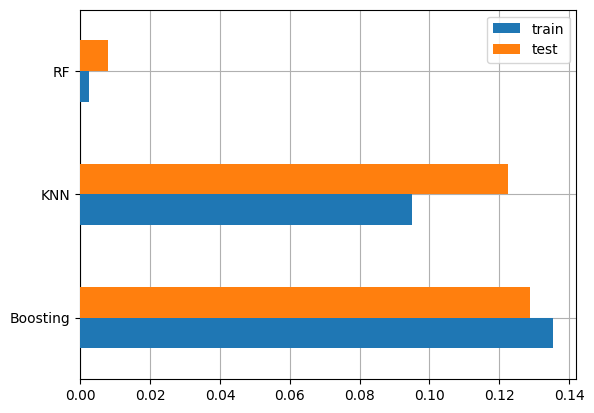

In [41]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [42]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true': y_test[:1]}

for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(0)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
5063,280,285.0,281.0,280.0


## Diskusi dan Interpretasi
1. MSE vs Hasil Prediksi:
Meskipun Random Forest memiliki MSE yang paling rendah, prediksinya pada contoh spesifik ini tidak lebih akurat daripada Boosting. Hal ini menunjukkan bahwa MSE mencerminkan performa rata-rata model, bukan performa pada sampel individual.

2. Boosting:
Meskipun memiliki MSE yang lebih tinggi secara keseluruhan, Boosting memberikan prediksi paling akurat untuk contoh ini. Ini bisa terjadi karena model Boosting mungkin lebih baik dalam menangkap pola tertentu tetapi kurang optimal pada data secara keseluruhan.

3. KNN:
Prediksi KNN pada sampel ini lebih jauh dari nilai sebenarnya, mendukung hasil MSE yang menunjukkan performanya lebih buruk dibandingkan RF.

# Kesimpulan
Untuk performa keseluruhan, Random Forest tetap menjadi model terbaik berdasarkan MSE yang rendah.

**Distribusi Variabel Kategori:**
- **Make**: Ford, BMW, dan Chevrolet paling sering digunakan, sementara Lamborghini paling rendah.
- **Vehicle Class**: SUV-Small, Mid-Size, dan Compact adalah yang paling umum, sedangkan Van-Cargo paling sedikit digunakan.
- **Transmission**: AS6, AS8, M6, dan A6 adalah transmisi yang paling umum, sementara AV10, AM5, AS4, dan AM9 paling jarang.
- **Fuel Type**: Regular (X) dan Premium (Z) adalah bahan bakar yang paling sering digunakan, sedangkan E85 (E) dan Diesel (D) digunakan dengan rentang 147-223, sementara Natural Gas (N) hanya ada satu entri.

**Distribusi Fitur Numerik:**
- **Engine Size (L)**: Ukuran mesin antara 2-4 liter adalah yang paling umum.
- **Cylinders**: Mobil dengan 4, 6, dan 8 silinder adalah yang paling banyak digunakan.
- **Fuel Consumption (City)**: Konsumsi bahan bakar paling sering di kisaran 10-13L per 100 km.
- **Fuel Consumption (Hwy)**: Konsumsi bahan bakar paling banyak di kisaran 7-9L per 100 km.
- **Fuel Consumption (Comb)**: Paling banyak di kisaran 8-12L per 100 km.
- **Fuel Consumption (mpg)**: Kisaran 20-35 miles per gallon paling banyak digunakan.
- **CO2 Emissions**: Emisi terbanyak berada di kisaran 200-250 g/km.

**Distribusi Kategori terhadap CO2 Emissions:**
- **Make**: Merek seperti Lamborghini, Aston Martin, Bentley, dan Maserati memiliki emisi tertinggi, tetapi penggunaannya rendah.
- **Vehicle Class**: Van-Cargo dan Van-Passenger menyumbang emisi tertinggi meskipun jarang digunakan. SUV-Small, Mid-Size, dan Compact menghasilkan emisi antara 200-250 g/km.
- **Transmission**: A10, A7, dan A5 menyumbang emisi tertinggi meskipun jarang digunakan. AS6, AS8, dan M6, yang lebih sering digunakan, menyumbang emisi dalam kisaran 200-250 g/km.
- **Fuel Type**: Semua jenis bahan bakar menyumbang emisi tinggi, meskipun tipe N (Natural Gas) hanya memiliki satu data, sehingga tidak bisa disimpulkan.

**Relasi antara Fitur Numerik dan CO2 Emissions:**
- Terdapat relasi positif antara sebagian besar fitur numerik (seperti Engine Size, Cylinders, dan Fuel Consumption) dengan CO2 emissions, yang berarti semakin besar ukuran mesin, jumlah silinder, atau konsumsi bahan bakar, semakin tinggi emisi yang dihasilkan.
- **Fuel Consumption (mpg)** menunjukkan relasi negatif, karena semakin tinggi efisiensi bahan bakar, semakin rendah emisi CO2 yang dihasilkan.


# Persiapkan Laporan

In [43]:
# !pip install nbconvert
!jupyter nbconvert --to markdown /content/Predicitve_Analytic_Vehicle_Emissions.ipynb

[NbConvertApp] WARNING | pattern '/content/Predicitve_Analytic_Vehicle_Emissions.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jupyte

In [44]:
!zip -r gambar_files.zip Predicitve_Analytic_Vehicle_Emissions_files

	zip warning: name not matched: Predicitve_Analytic_Vehicle_Emissions_files

zip error: Nothing to do! (try: zip -r gambar_files.zip . -i Predicitve_Analytic_Vehicle_Emissions_files)


# Referensi

> 1. Anggraeni, D. N. (2017). Kajian Emisi CO2 Dari Kendaraan Bermotor Di Kampus I Universitas Brawijaya Dan Kampus I Universitas Negeri Malang. Retrieved from https://api.semanticscholar.org/CorpusID:127584962

> 2. Sudarti, S., Yushardi, Y., & Kasanah, N. (2022). Analisis Potensi Emisi CO2 Oleh Berbagai Jenis Kendaraan Bermotor di Jalan Raya Kemantren Kabupaten Sidoarjo. *Jurnal Sumberdaya Alam dan Lingkungan*. Retrieved from https://api.semanticscholar.org/CorpusID:252253520

> 3. Kusumawardani, D., & Navastara, A. M. (2018). Analisis Besaran Emisi Gas CO2 Kendaraan Bermotor Pada Kawasan Industri SIER Surabaya. *Jurnal Teknik ITS*, 6, 399-402. Retrieved from https://api.semanticscholar.org/CorpusID:115275286

> 4. Kusumawardani, D. (2017). Arahan Penyediaan Ruang Terbuka Hijau Dalam Menyerap Emisi Gas Co2 Kendaraan Bermotor Pada Kawasan Industri Sier, Surabaya. Retrieved from https://api.semanticscholar.org/CorpusID:169900032

> 5. Amelia, C. R., Samadikun, B. P., & Huboyo, H. S. (2017). Analisis Shifting Penggunaan Moda Kendaraan Bermotor Ke Kereta Api Terhadap Penurunan Emisi Gas Rumah Kaca (CO2, CH4, dan N2O) Studi Kasus: Daerah Operasional VIII Surabaya. Retrieved from https://api.semanticscholar.org/CorpusID:114581634

> 6. Paradizsa, I. (2023). Analisis Kebijakan Pengendalian Polusi melalui Uji Emisi Kendaraan Bermotor Berbahan Bakar Minyak (BBM) di Wilayah DKI Jakarta. *Jurnal Enviscience*. Retrieved from https://api.semanticscholar.org/CorpusID:268714970

> 7. Buanawati, T. T., Huboyo, H. S., & Samadikun, B. P. (2017). Estimasi Emisi Pencemar Udara Konvensional (SOx, NOx, CO, dan PM) Kendaraan Pribadi Berdasarkan Metode International Vehicle Emission (IVE) di Beberapa Ruas Jalan Kota Semarang. Retrieved from https://api.semanticscholar.org/CorpusID:117120421
